# Week 10 Exercise 
## Lillian Mueller
are the previous models good classifiers when compared to the naive bayes classifer?

In [75]:
from sklearn import (
    linear_model, 
    preprocessing,
    model_selection,
    metrics, 
    tree, 
    neighbors, 
    naive_bayes
    )
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [76]:
# loading in the iris dataset from sklearn
iris_data = load_iris()

# turning dataset into dataframe format for easier reading
df_iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

# adding the target as a class column and renaming numbers to class names
# 0 = setosa, 1 = versicolor, 2 = virginica

df_iris['class'] = iris_data.target.tolist()
df_iris['class'].replace({0: 'setosa', 1: 'versicolor', 2: 'virginica'}, inplace=True)

#Create a new column for the target (to be ready for processing)
label_obj = preprocessing.LabelEncoder()
df_iris['class_level'] = label_obj.fit_transform(df_iris['class'])

print("Full Dataset:")
df_iris.sample(4)

Full Dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,class_level
88,5.6,3.0,4.1,1.3,versicolor,1
7,5.0,3.4,1.5,0.2,setosa,0
125,7.2,3.2,6.0,1.8,virginica,2
79,5.7,2.6,3.5,1.0,versicolor,1


In [77]:
# cross validation of logistic model without penality
# using without penality highest accuracy as shown in report 3
predictors, target = iris_data.data, iris_data.target

x_train, x_test, y_train, y_test = model_selection.train_test_split(
    predictors, 
    target, 
    test_size = 0.33, 
    random_state=8, 
    stratify=target
    )

class_code =  {
    'setosa' : 0, 
    'versicolor' : 1,
    'virginica' : 2
}
label_binarizer = preprocessing.LabelBinarizer().fit(y_train)

results_1 = {}
roc_1 = {}

In [78]:
# function to create confusion matrix for a model 
def eval_model(name, model, results_dict, roc_dict, iris_class):

    # Test model with testing dataset and find accuracy 
    pred = model.predict(x_test)

    # get classification report 
    print(
        f'Classification Report for {name} Model\n', 
        metrics.classification_report(y_test, pred))

    results_dict[name] = [
            metrics.accuracy_score(y_test, pred), 
            metrics.recall_score(y_test, pred, average=None), 
            metrics.precision_score(y_test, pred, average=None)
        ]
    
    y_test_binarized = label_binarizer.transform(y_test)
    pred_binarized = label_binarizer.transform(pred)

    fpr, tpr, _ = metrics.roc_curve(
        y_test_binarized[:, class_code[iris_class]], 
        pred_binarized[:, class_code[iris_class]])
    auc = metrics.auc(fpr, tpr)
    roc_dict[f'{name}_{iris_class}'] = {
        'fpr':fpr, 
        'tpr':tpr, 
        'auc':auc
    }

In [79]:
eval_model(
    'Naive Bayes', 
    naive_bayes.GaussianNB().fit(x_train, y_train), 
    results_1, 
    roc_1, 
    'versicolor'
)

Classification Report for Naive Bayes Model
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.79      0.88      0.83        17
           2       0.86      0.75      0.80        16

    accuracy                           0.88        50
   macro avg       0.88      0.88      0.88        50
weighted avg       0.88      0.88      0.88        50



In [80]:
eval_model(
    'Linear Discriminant Analysis', 
    LinearDiscriminantAnalysis().fit(x_train, y_train), 
    results_1, 
    roc_1, 
    'versicolor'
)

Classification Report for Linear Discriminant Analysis Model
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.94      1.00      0.97        17
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [81]:
# create decision tree model using same training and test datasets 
eval_model(
    'Decision Tree', 
    tree.DecisionTreeClassifier(criterion='gini').fit(x_train, y_train),
    results_1, 
    roc_1,
    'versicolor'
)

Classification Report for Decision Tree Model
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.80      0.94      0.86        17
           2       0.92      0.75      0.83        16

    accuracy                           0.90        50
   macro avg       0.91      0.90      0.90        50
weighted avg       0.91      0.90      0.90        50



In [82]:
eval_model(
    'Logistic Regression', 
    linear_model.LogisticRegression(penalty=None).fit(x_train, y_train),
    results_1, 
    roc_1,
    'versicolor'
)

Classification Report for Logistic Regression Model
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.86      0.71      0.77        17
           2       0.74      0.88      0.80        16

    accuracy                           0.86        50
   macro avg       0.86      0.86      0.86        50
weighted avg       0.87      0.86      0.86        50



In [83]:
# create KNN model using same training and test datasets 
eval_model(
    'K-Nearest Neighbor', 
    neighbors.KNeighborsClassifier(
        n_neighbors=10,
        metric='euclidean').fit(x_train, y_train), 
    results_1, 
    roc_1, 
    'versicolor'
)

Classification Report for K-Nearest Neighbor Model
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.94      0.94      0.94        17
           2       0.94      0.94      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [84]:
print(pd.DataFrame(results_1))

                                     Naive Bayes  \
0                                           0.88   
1                [1.0, 0.8823529411764706, 0.75]   
2  [1.0, 0.7894736842105263, 0.8571428571428571]   

     Linear Discriminant Analysis                    Decision Tree  \
0                            0.98                              0.9   
1              [1.0, 1.0, 0.9375]  [1.0, 0.9411764705882353, 0.75]   
2  [1.0, 0.9444444444444444, 1.0]   [1.0, 0.8, 0.9230769230769231]   

                             Logistic Regression  \
0                                           0.86   
1               [1.0, 0.7058823529411765, 0.875]   
2  [1.0, 0.8571428571428571, 0.7368421052631579]   

                  K-Nearest Neighbor  
0                               0.96  
1  [1.0, 0.9411764705882353, 0.9375]  
2  [1.0, 0.9411764705882353, 0.9375]  


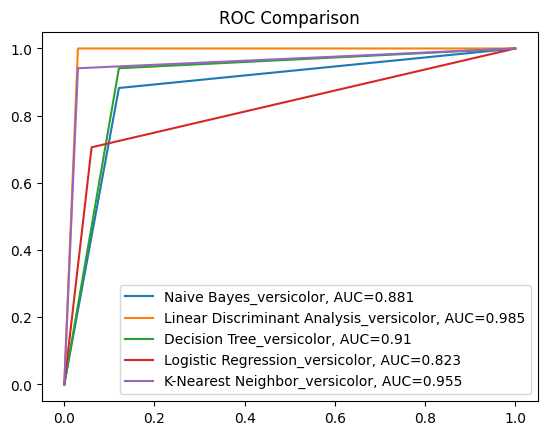

In [85]:
def graph_roc_curves(name, roc_dict):
    plt.figure(1).clf()
    for classifier in roc_dict.keys():
        plt.plot(
            roc_dict[classifier]['fpr'], 
            roc_dict[classifier]['tpr'],
            label=f"{classifier}, AUC="+str(round(roc_dict[classifier]['auc'],3)))
    plt.legend()
    plt.title('ROC Comparison')
    plt.savefig(f'{name}.png')
    plt.show()

graph_roc_curves('rocCurves_versicolor', roc_1)

Classification Report for Naive Bayes Model
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.79      0.88      0.83        17
           2       0.86      0.75      0.80        16

    accuracy                           0.88        50
   macro avg       0.88      0.88      0.88        50
weighted avg       0.88      0.88      0.88        50

Classification Report for Linear Discriminant Analysis Model
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.94      1.00      0.97        17
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

Classification Report for Decision Tree Model
               precision    recall  f1-score   support

           0       1.00      

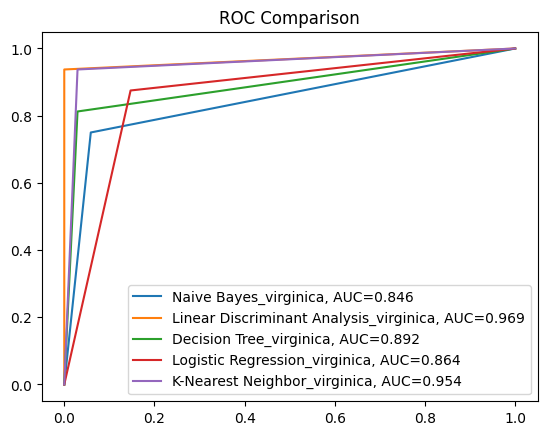

In [87]:
names = [
    'Naive Bayes', 
    'Linear Discriminant Analysis', 
    'Decision Tree', 
    'Logistic Regression', 
    'K-Nearest Neighbor'
]

models = [
    naive_bayes.GaussianNB().fit(x_train, y_train), 
    LinearDiscriminantAnalysis().fit(x_train, y_train), 
    tree.DecisionTreeClassifier(criterion='gini').fit(x_train, y_train),
    linear_model.LogisticRegression(penalty=None).fit(x_train, y_train),
    neighbors.KNeighborsClassifier(
        n_neighbors=10,
        metric='euclidean').fit(x_train, y_train)
]

results_2 = {}
roc_2 = {}

for i in range(len(names)):
    eval_model(
        names[i], 
        models[i], 
        results_2, 
        roc_2, 
        'virginica'
    )

graph_roc_curves('rocCurves_virginica', roc_2)

In [92]:
# Comparison of score means and standard deviation 
# create table comparing average and std of multiple dataframes
def comparison_table(dfs, columns):
    meanScores = pd.concat(
        [df.mean() for df in dfs], 
        axis=1)
    meanScores.columns = [col for col in columns]

    stdScores = pd.concat(
        [df.std() for df in dfs], 
        axis=1)
    stdScores.columns = [col for col in columns]

    comparison = pd.concat([meanScores, stdScores], ignore_index=True)
    comparison.index = ['Mean', 'Stardard Dev.']
    return comparison
    
def cross_val(names, estimators, numfolds):

    cross_results = []

    for estimator in estimators: 
        cross_val = model_selection.cross_val_score(
            estimator, 
            predictors, 
            target, 
            cv = numfolds,
            scoring='accuracy'
        )
        cross_results.append(pd.DataFrame(cross_val))

    return comparison_table(cross_results, names).T.round(3)

In [93]:
# using names from

estimators = [
    naive_bayes.GaussianNB(), 
    LinearDiscriminantAnalysis(), 
    tree.DecisionTreeClassifier(criterion='gini'),
    linear_model.LogisticRegression(penalty=None),
    neighbors.KNeighborsClassifier(
        n_neighbors=10,
        metric='euclidean')
]

cross_val(names, estimators, 10)

,Mean,Stardard Dev.
Naive Bayes,0.953,0.045
Linear Discriminant Analysis,0.980,0.045
Decision Tree,0.960,0.047
Logistic Regression,0.980,0.045
K-Nearest Neighbor,0.967,0.047
